# Example visualization of neural data in the BrainTreebank dataset

First, let's see which subjects and trials correspond to which movies. NOTE: subject trial identifiers like "btbank2_4" mean the BrainTreebank subject 2, trial 4. Trial = recording session.

In [1]:
import evaluation.neuroprobe.config as neuroprobe_config
import json, numpy as np

print(json.dumps(neuroprobe_config.BRAINTREEBANK_SUBJECT_TRIAL_MOVIE_NAME_MAPPING, indent=4))

{
    "btbank1_0": "fantastic-mr-fox",
    "btbank1_1": "the-martian",
    "btbank1_2": "thor-ragnarok",
    "btbank2_0": "venom",
    "btbank2_1": "spider-man-3-homecoming",
    "btbank2_2": "guardians-of-the-galaxy",
    "btbank2_3": "guardians-of-the-galaxy-2",
    "btbank2_4": "avengers-infinity-war",
    "btbank2_5": "black-panther",
    "btbank2_6": "aquaman",
    "btbank3_0": "cars-2",
    "btbank3_1": "lotr-1",
    "btbank3_2": "lotr-2",
    "btbank4_0": "shrek-the-third",
    "btbank4_1": "megamind",
    "btbank4_2": "incredibles",
    "btbank5_0": "fantastic-mr-fox",
    "btbank6_0": "megamind",
    "btbank6_1": "toy-story",
    "btbank6_4": "coraline",
    "btbank7_0": "cars-2",
    "btbank7_1": "megamind",
    "btbank8_0": "sesame-street-episode-3990",
    "btbank9_0": "ant-man",
    "btbank10_0": "cars-2",
    "btbank10_1": "spider-man-far-from-home"
}


Now, let's get example neural data from subject 7, trial 0 (this is movie Cars 2)

In [2]:
from subject.braintreebank import BrainTreebankSubject

subject_id, trial_id = 7, 0
subject = BrainTreebankSubject(subject_id, cache=False)
subject.load_neural_data(trial_id)

electrode_labels = subject.get_electrode_labels()
print(f"Subject {subject.subject_identifier} has {len(electrode_labels)} electrodes sampled at sampling rate {subject.get_sampling_rate()} Hz")
print(f"Electrode labels: {electrode_labels}\n")

example_all_electrode_data = subject.get_all_electrode_data(trial_id, window_from=0, window_to=2 * neuroprobe_config.SAMPLING_RATE)
print(f"Example all electrode data shape: {example_all_electrode_data.shape}")
print(f"Example all electrode data: {example_all_electrode_data}\n")

# This will be useful later
print("Computing spectrogram normalization parameters for all electrodes using the first 10 minutes of the trial...")
from analyses.visualization import compute_spectrogram_normalization_parameters
spectrogram_normalization_parameters = compute_spectrogram_normalization_parameters(subject, trial_id)

Subject btbank7 has 240 electrodes sampled at sampling rate 2048 Hz
Electrode labels: ['LT2H1', 'LT2H2', 'LT2H3', 'LT2H4', 'LT2H5', 'LT2H6', 'LT2H7', 'LT2H8', 'LT2H9', 'LT2H10', 'LT2H11', 'LT2H12', 'LT2H13', 'LT2H14', 'LT2H15', 'LT2H16', 'LT1A1', 'LT1A2', 'LT1A3', 'LT1A4', 'LT1A5', 'LT1A6', 'LT1A7', 'LT1A8', 'LT1A9', 'LT1A10', 'LT1A11', 'LT1A12', 'LT1A13', 'LT1A14', 'LF3aOFa1', 'LF3aOFa2', 'LF3aOFa3', 'LF3aOFa4', 'LF3aOFa5', 'LF3aOFa6', 'LF3aOFa7', 'LF3aOFa8', 'LF3aOFa9', 'LF3aOFa10', 'LF3aOFa11', 'LF3aOFa12', 'LF3aOFa13', 'LF3aOFa14', 'LF3aOFa15', 'LF3aOFa16', 'LF3cIc1', 'LF3cIc2', 'LF3cIc3', 'LF3cIc4', 'LF3cIc5', 'LF3cIc6', 'LF3cIc7', 'LF3cIc8', 'LF3cIc9', 'LF3cIc10', 'LF3bOFb1', 'LF3bOFb2', 'LF3bOFb3', 'LF3bOFb4', 'LF3bOFb5', 'LF3bOFb6', 'LF3bOFb7', 'LF3bOFb8', 'LF3bOFb9', 'LF3bOFb10', 'LF3bOFb11', 'LF3bOFb12', 'LF3bOFb13', 'LF3bOFb14', 'LF3bOFb15', 'LF3bOFb16', 'LF2b1', 'LF2b2', 'LF2b3', 'LF2b4', 'LF2b5', 'LF2b6', 'LF2b7', 'LF2b8', 'LF2b9', 'LF2b10', 'LF2b11', 'LF2b12', 'LF2b13', '

Let's say we want to plot random 24 electrodes of a subject during movie time from 1120 to 1180 seconds. We will need to go through the following steps:
1. Select our random electrode labels
2. Find the index into neural data at movie time 1120 and movie time 1180
3. Put the parameters into the function

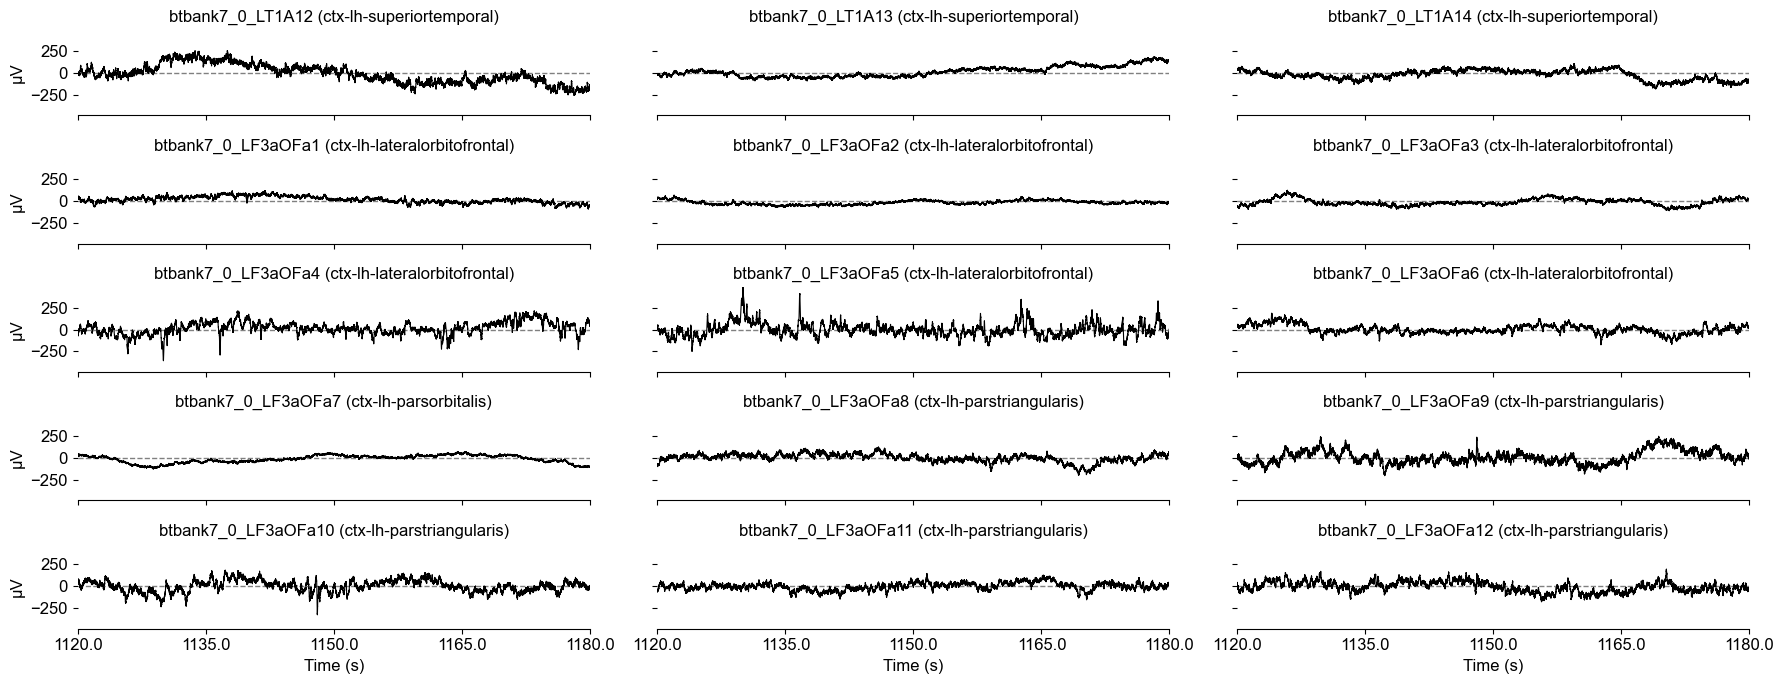

In [7]:
from analyses.visualization import plot_electrode_data, braintreebank_movie_times_to_neural_index

random_electrode_labels = ['LT1A12', 'LT1A13', 'LT1A14', 'LF3aOFa1', 'LF3aOFa2', 'LF3aOFa3', 'LF3aOFa4', 'LF3aOFa5', 'LF3aOFa6', 'LF3aOFa7', 'LF3aOFa8', 'LF3aOFa9', 'LF3aOFa10', 'LF3aOFa11', 'LF3aOFa12']
movie_start_time = 1120
movie_end_time = 1180

movie_start_index = braintreebank_movie_times_to_neural_index(subject, trial_id, movie_start_time)
movie_end_index = braintreebank_movie_times_to_neural_index(subject, trial_id, movie_end_time)

plot_electrode_data(subject=subject, trial_id=trial_id, 
                    window_from=movie_start_index, window_to=movie_end_index, 
                    electrodes=random_electrode_labels,
                    time_start=movie_start_time, time_end=movie_end_time)

Now, let's say we want to plot the spectrogram of the signal instead of the raw signal. The spectrogram will show us what happens at the higher frequencies in the signal too, which is hard to see in the raw voltage traces.

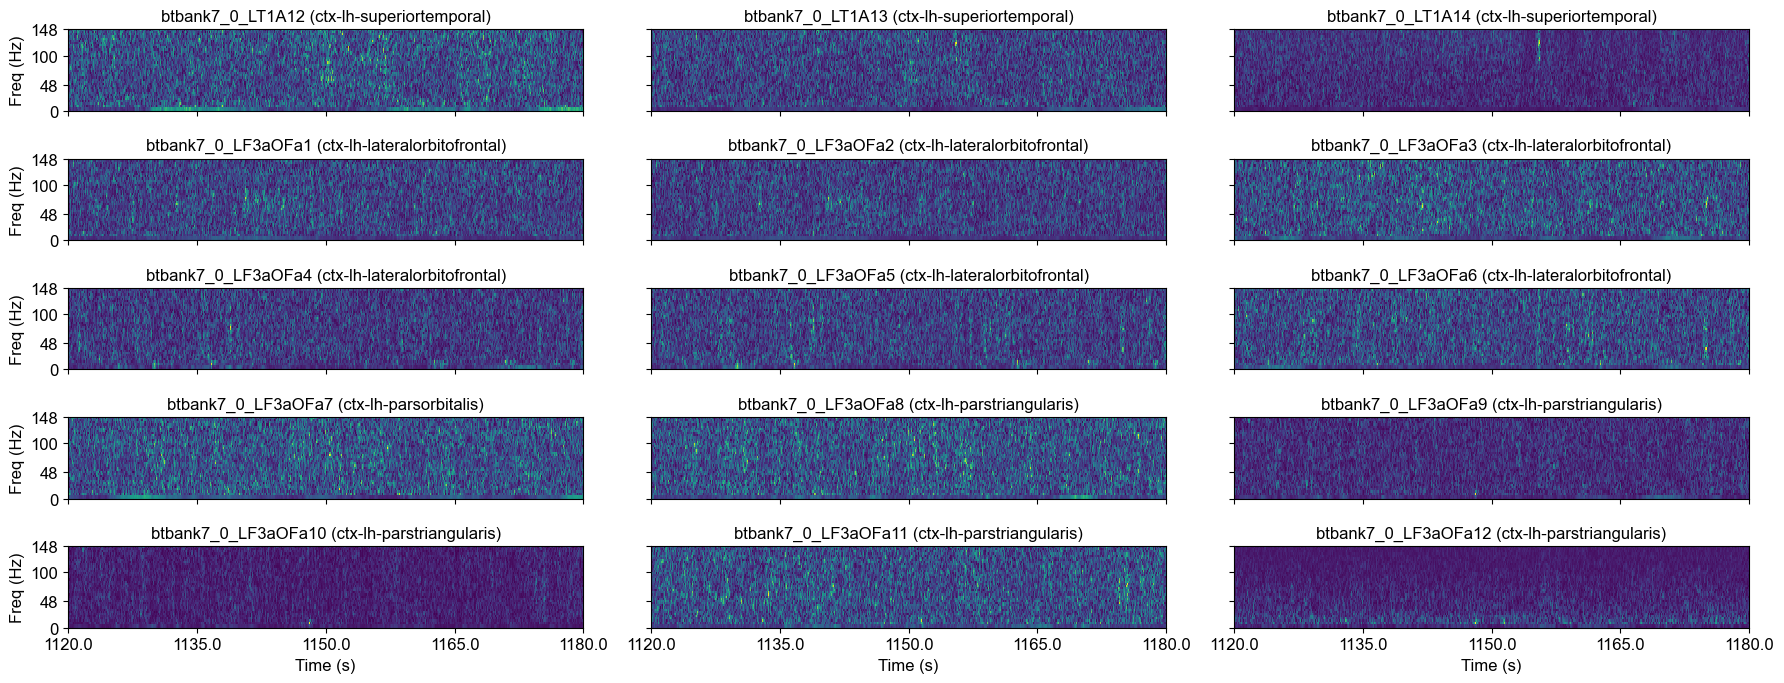

In [8]:
plot_electrode_data(subject=subject, trial_id=trial_id, 
                    window_from=movie_start_index, window_to=movie_end_index, 
                    electrodes=random_electrode_labels,
                    time_start=movie_start_time, time_end=movie_end_time,
                    spectrogram=True, spectrogram_normalization_parameters=spectrogram_normalization_parameters) # Note this added parameter to the function

Now let's add two annotations to the plot, which will make neural effects during events more easy to detect

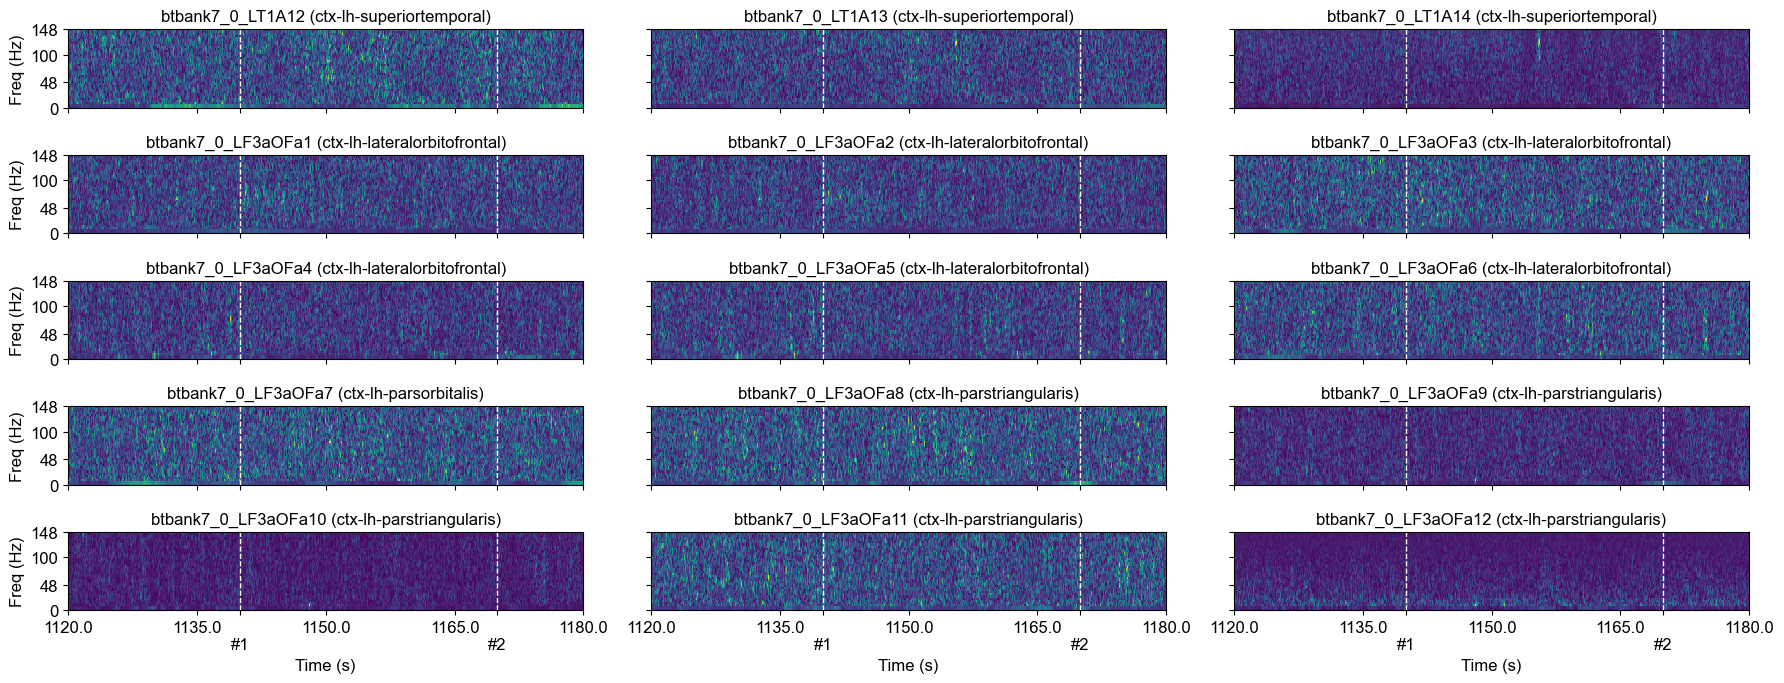

In [10]:
annotations = {
    1140: "Annotation 1", # format: {time_seconds: annotation_text}
    1170: "Annotation 2"
}

plot_electrode_data(subject=subject, trial_id=trial_id, 
                    window_from=movie_start_index, window_to=movie_end_index, 
                    electrodes=random_electrode_labels,
                    time_start=movie_start_time, time_end=movie_end_time,
                    spectrogram=True, spectrogram_normalization_parameters=spectrogram_normalization_parameters,
                    annotations=annotations)

A couple more optional parameters you can use to make things more convenient:

```python
plot_electrode_data(subject=subject, trial_id=trial_id, 
                    window_from=movie_start_index, window_to=movie_end_index, 
                    electrodes=random_electrode_labels,
                    time_start=movie_start_time, time_end=movie_end_time,
                    spectrogram=True, spectrogram_normalization_parameters=spectrogram_normalization_parameters,
                    annotations=annotations,
                    
                    n_columns=3, # number of columns in the subplot grid
                    
                    plot_width=1, plot_height=1, # if you want to make the plots wider or taller, to see them in more detail, increase these values
                    
                    save_path='analyses/example_figure.pdf') # Where to save a copy of the figure (.pdf recommended for best quality), so that it can be shared and examined in more detail
```

Now, let's say we want to find and plot only specific electrodes. For example, only amygdala electrodes. Here are example steps:

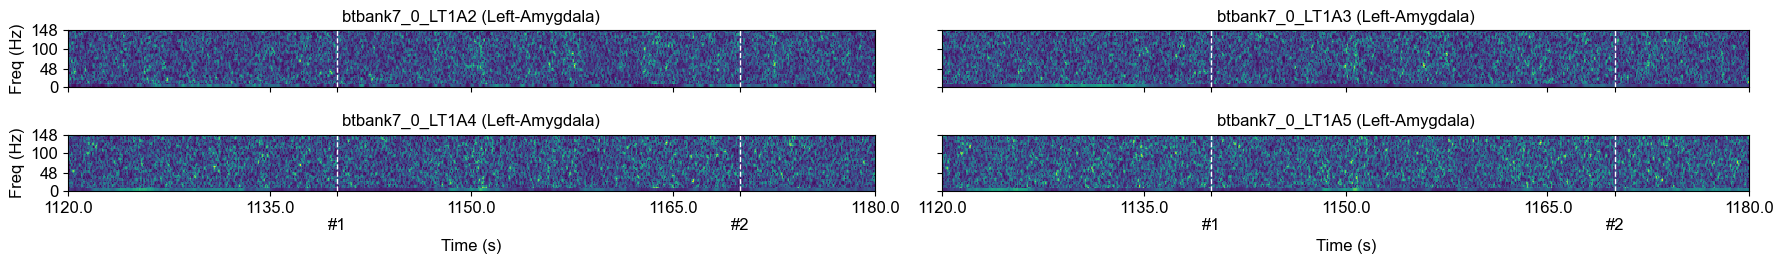

In [11]:
# First, let's get the electrode locations according to the Desikan-Killiany atlas
electrode_locations = {electrode_label: subject.get_electrode_metadata(electrode_label)['DesikanKilliany'] for electrode_label in subject.get_electrode_labels()}

# Then, let's get the amygdala electrode locations (containing the word "amygdala" in the location string)
amygdala_electrode_locations = {label: location for label, location in electrode_locations.items() if 'amygdala' in location.lower()}
amygdala_electrode_labels = list(amygdala_electrode_locations.keys())
assert len(amygdala_electrode_labels) > 0, "There should be at least one amygdala electrode, but there are none"

# Now, let's plot the data from the amygdala electrodes
plot_electrode_data(subject=subject, trial_id=trial_id, 
                    window_from=movie_start_index, window_to=movie_end_index, 
                    electrodes=amygdala_electrode_labels,

                    time_start=movie_start_time, time_end=movie_end_time,
                    spectrogram=True,
                    annotations=annotations,
                    n_columns=2,
                    plot_width=1.5)